# Sequence On Different Nerual Networks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph
from sklearn.decomposition import PCA
from IPython.display import display

graph.style.use('fivethirtyeight')

def convert_letter_to_char(letter):
    return ord(letter.lower()) - 96 if letter is not None else 0

In [2]:
# Load
males = pd.read_csv('data/names/male_names.csv', comment='#', header=-1, names=['name'])
females = pd.read_csv('data/names/female_names.csv', comment='#', header=-1, names=['name'])

# Label
males['gender'] = 'm'
females['gender'] = 'f'

# Concat and reindex
names = pd.concat([males, females])
names.sort_values(by='name', inplace=True)
names.reset_index(drop=True, inplace=True)

display(males.head())
display(females.head())
display(names.head())

,name,gender
0,Aamir,m
1,Aaron,m
2,Abbey,m
3,Abbie,m
4,Abbot,m


,name,gender
0,Abagael,f
1,Abagail,f
2,Abbe,f
3,Abbey,f
4,Abbi,f


,name,gender
0,Aamir,m
1,Aaron,m
2,Abagael,f
3,Abagail,f
4,Abbe,f


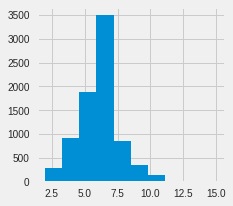

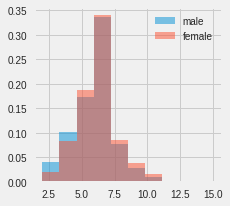

count    7944.000000
mean        6.032855
std         1.567019
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: name, dtype: float64


In [3]:
def hist(x, label):
    graph.hist(x, bins=10, label=label, normed=True, alpha=0.5)

graph.figure(figsize=(3, 3))
graph.hist(names['name'].str.len(), bins=10)
graph.show()

graph.figure(figsize=(3, 3))
hist(names[names['gender'] == 'm']['name'].str.len(), 'male')
hist(names[names['gender'] == 'f']['name'].str.len(), 'female')
graph.legend(loc=0)
graph.show()

print(names['name'].str.len().describe())

In [4]:
print(convert_letter_to_char('c'))

3


In [5]:
names['split'] = names['name'].apply(lambda s: ','.join([l for l in s]))
display(names.head())

df = names['split'].str.split(',', expand=True)
display(df.head())

# Encode
for col in df.columns:
    df[col] = df[col].apply(convert_letter_to_char)
display(df.head())

# Names as Numbers
df.index = names['name']

,name,gender,split
0,Aamir,m,"A,a,m,i,r"
1,Aaron,m,"A,a,r,o,n"
2,Abagael,f,"A,b,a,g,a,e,l"
3,Abagail,f,"A,b,a,g,a,i,l"
4,Abbe,f,"A,b,b,e"


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,A,a,m,i,r,None,None,None,None,None,None,None,None,None,None
1,A,a,r,o,n,None,None,None,None,None,None,None,None,None,None
2,A,b,a,g,a,e,l,None,None,None,None,None,None,None,None
3,A,b,a,g,a,i,l,None,None,None,None,None,None,None,None
4,A,b,b,e,None,None,None,None,None,None,None,None,None,None,None


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,13,9,18,0,0,0,0,0,0,0,0,0,0
1,1,1,18,15,14,0,0,0,0,0,0,0,0,0,0
2,1,2,1,7,1,5,12,0,0,0,0,0,0,0,0
3,1,2,1,7,1,9,12,0,0,0,0,0,0,0,0
4,1,2,2,5,0,0,0,0,0,0,0,0,0,0,0


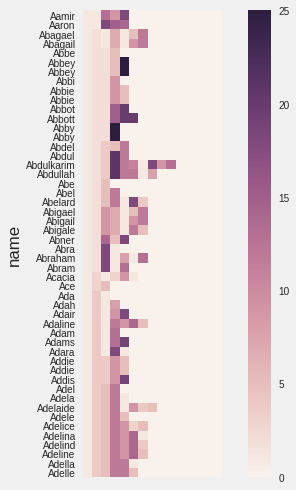

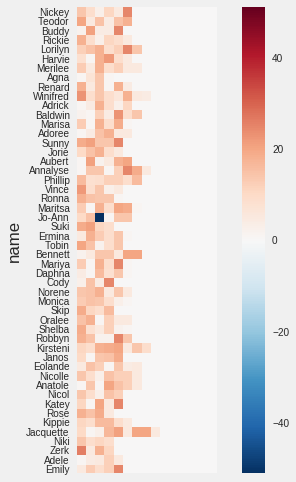

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


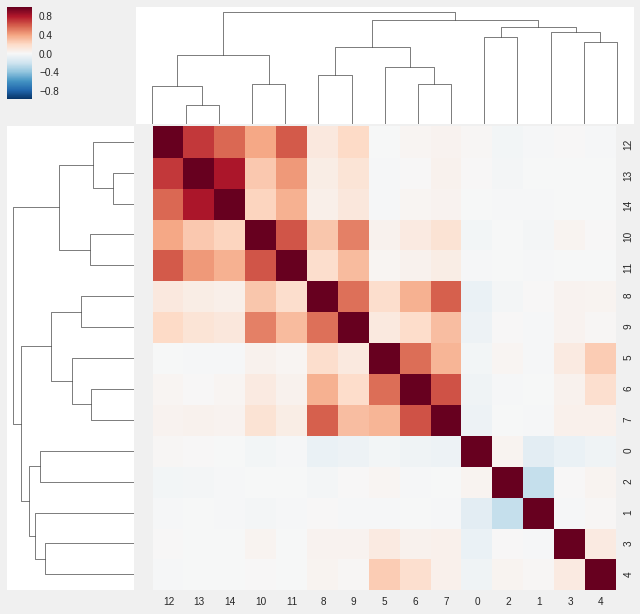

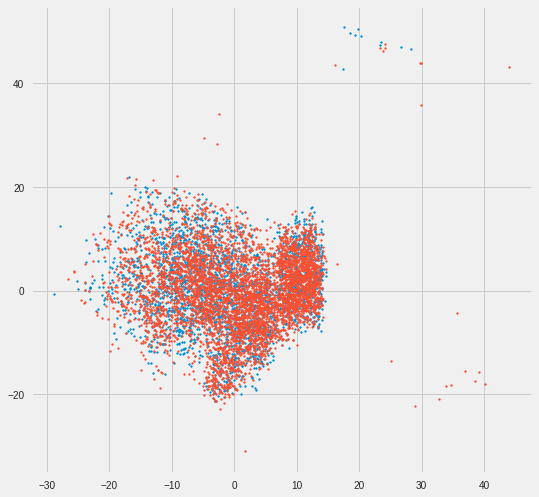

In [11]:
# Data Viz
graph.figure(figsize=(8, 8))
sns.heatmap(df.head(50), square=True, xticklabels=False)
graph.show()

graph.figure(figsize=(8, 8))
sns.heatmap(df.sample(50), square=True, xticklabels=False)
graph.show()

sns.clustermap(df.corr('spearman'), square=True)
graph.show()

pca_x = PCA(n_components=2).fit_transform(df.values)
graph.figure(figsize=(8, 8))
for gender in ['m', 'f']:
    graph.scatter(pca_x[names['gender'] == gender, 0], pca_x[names['gender'] == gender, 1], s=3)
graph.show()

# Modelling time?

I have no idea if this will work. Looking at the data I'd be very amazed if it does anything...